# Mineria de datos

## Avance II PIA

### Grupo 003, Equipo: 14, Frecuencia: Viernes 18:00-21:00 

#### Integrantes: Mauricio Enrique Espinosa Martinez 1740483

# Segmentacion en un centro comercial

https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

## Descripcion de los datos

Se tiene un centro comercial de supermercado y, a través de las tarjetas de membresía, tiene algunos datos básicos sobre sus clientes, como ID de cliente, edad, sexo, ingresos anuales y puntaje de gastos.
El puntaje de gastos es algo que le asigna al cliente en función de sus parámetros definidos, como el comportamiento del cliente y los datos de compra.

#### Variables

•	**Customer ID**: Es el ID único que cuenta cada persona   
•	**Gender**: Que nos indica el Género de cada persona   
•	**Age**: La edad de cada persona   
•	**Annual Income (K$)**: Los ingresos anuales de cada persona    
•	**Spending Score (1-100)**: Lo que gastó en el tiempo dado en el centro comercial   




# Justificación de los datos

Me interesó esta base de datos porque con ella puedo crear un plan de marketing a futuro dado a que como objetivo principal es conocer cual es el mercado objetivo (clientes objetivo) y con esto creo que me beneficia mas a la forma estadística dado a que podríamos usar una regresión para saber que datos influyen o no a la hora de hacer mis predicciones.

# Objetivo principal


 Como objetivo principal u objetivo final es saber cuál es mi mercado base (Clientes objetivo) dado que gracias a esto el centro comercial se podrá enfocar más en la producción de tiendas y locales para el respectivo cliente objetivo y así apuntar a los gustos de dicho cliente


# Lectura de datos

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

Importamos las librerías que se llevaran acabo

In [3]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/Septimo semestre/Mineria de datos/Mall_Customers_mod.csv",encoding='utf8')

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,34,Male,18,33,92
1,66,Male,18,48,59
2,92,Male,18,59,41
3,115,Female,18,65,48
4,1,Male,19,15,39
...,...,...,...,...,...
195,91,Female,68,59,55
196,109,Male,68,63,43
197,58,Male,69,44,46
198,61,Male,70,46,56


Leemos los datos como los tenemos guardados desde mi carpeta.

# Limpieza de datos

In [5]:
df=df.rename(columns = {'Annual Income (k$)':'Ingresos anuales(Miles dls)','CustomerID':'ID','Gender':'Sexo','Age':'Edad','Spending Score (1-100)':'Puntaje de compras(1-100)'})

In [6]:
df=df.drop('ID',axis = 1 )

In [7]:
df

,Sexo,Edad,Ingresos anuales(Miles dls),Puntaje de compras(1-100)
0,Male,18,33,92
1,Male,18,48,59
2,Male,18,59,41
3,Female,18,65,48
4,Male,19,15,39
...,...,...,...,...
195,Female,68,59,55
196,Male,68,63,43
197,Male,69,44,46
198,Male,70,46,56


Aqui lo único que hicimos fue renombrar todas las variables y quitar la variable ID dado a que esta variable es insignificante para mi base de datos

In [8]:
df.columns

Index(['Sexo', 'Edad', 'Ingresos anuales(Miles dls)',
       'Puntaje de compras(1-100)'],
      dtype='object')

In [9]:
df.dtypes

Sexo                           object
Edad                            int64
Ingresos anuales(Miles dls)     int64
Puntaje de compras(1-100)       int64
dtype: object

In [10]:
df.isnull().any()

Sexo                           False
Edad                           False
Ingresos anuales(Miles dls)    False
Puntaje de compras(1-100)      False
dtype: bool

Como podemos observar mi base de datos no cuenta con datos nulos por lo que no hay necesidad de limpiarla 

# Análisis Estadístico

In [17]:
df.describe()

,Edad,Ingresos anuales(Miles dls),Puntaje de compras(1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


En esta parte describimos cada una de mis variables estadisticamente 

In [18]:
df.cov()

,Edad,Ingresos anuales(Miles dls),Puntaje de compras(1-100)
Edad,195.133166,-4.548744,-118.040201
Ingresos anuales(Miles dls),-4.548744,689.835578,6.716583
Puntaje de compras(1-100),-118.040201,6.716583,666.854271


Aqui como dato para saber si mis variables se relacionaban entre si usamos la covarianza.      
Y aparentemente no se ve que se relacionen mucho por eso mas adelante las graficaremos.

In [11]:
df["Sexo"].value_counts()

Female    112
Male       88
Name: Sexo, dtype: int64

Esta formula se uso para saber la cantidad de hombres y mujeres que tambien nos ayudara en un futuro a tomar nuestras respectivas decisiones 

# Gráficas

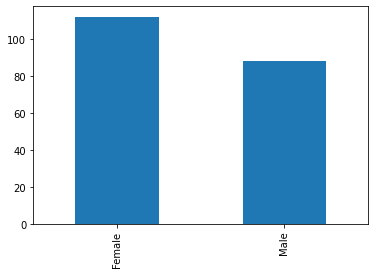

In [12]:
df['Sexo'].value_counts().plot.bar()

En esta grafica podemos observar que efectivamente hay mas mujeres que hombres en un centro comercial

In [13]:
df["Edad"].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
36     6
38     6
50     5
48     5
29     5
21     5
20     5
34     5
18     4
28     4
59     4
24     4
67     4
54     4
39     3
25     3
33     3
22     3
37     3
43     3
68     3
45     3
46     3
60     3
41     2
57     2
66     2
65     2
63     2
58     2
26     2
70     2
42     2
53     2
52     2
51     2
44     2
55     1
64     1
69     1
56     1
Name: Edad, dtype: int64

Usamos esta formula para saber en numeros que Edad se repite mas y dado a esto podriamos tomar algunas decisiones

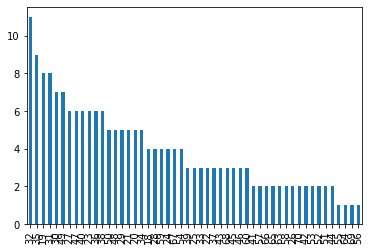

In [14]:
df['Edad'].value_counts().plot.bar()

En esta grafica queria representar las edades pero como podemos observar no se distingue asi que mas adelante especificaremos un numero para que se pueda apreciar mejor

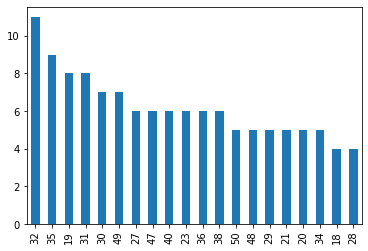

In [33]:
df['Edad'].value_counts().head(20).plot.bar()

Y bueno como podemos apreciar como hipotesis mi mercado objetivo se podria localizar entre las edades 19-50 descartando las edades de 50-70 aunque lo que mas importa a nosotros es el puntaje de compras por eso es una hipotesis.

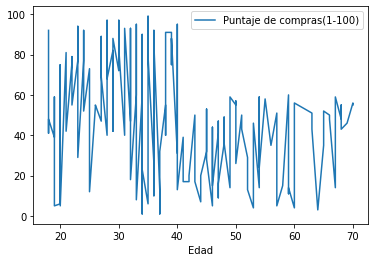

In [16]:
df.plot.line(x='Edad', y='Puntaje de compras(1-100)')

En esta grafica no se alcanza apreciar perfectamente quienes son los que invierten mas en mi mercado asi que pasaremos a otra grafica

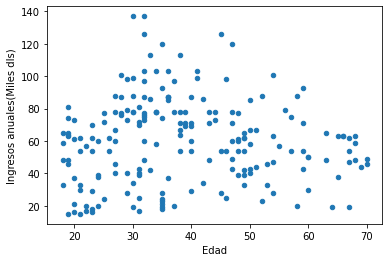

In [19]:
df[df['Edad']<200].sample(200).plot.scatter(x='Edad', y='Ingresos anuales(Miles dls)')

En esta grafica se podria deducir que el mercado objetivo en realidad está entre la edad de 20-40 con ingresos anuales entre 60-90 esto quiere decir que mi mercado se localiza en la clase media.    
Aunque no se ve tan visible asi que pasaremos a la siguiente gráfica 

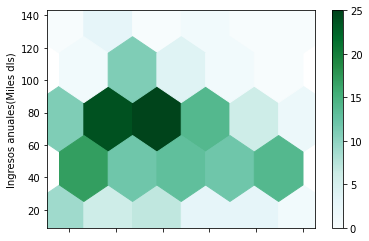

In [20]:
df[df['Edad'] < 200].plot.hexbin(x='Edad', y='Ingresos anuales(Miles dls)', gridsize=5)

Gráfica mas visible

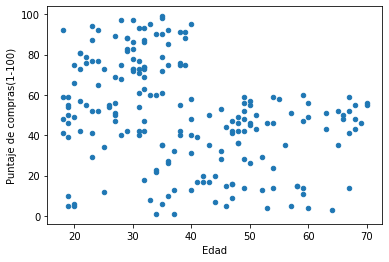

In [21]:
df[df['Edad'] < 200].plot.scatter(x='Edad', y='Puntaje de compras(1-100)')

En esta gráfica podemos observar que en si mi mercado objetivo se localiza entre la edad de 20-40 dado a que son los mejores compradores mas adelante se hara mas visible la gráfica

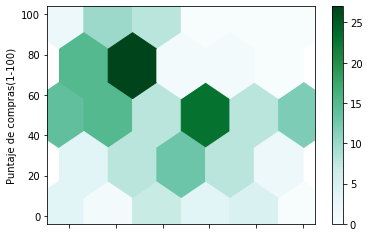

In [22]:
df[df['Edad'] < 200].plot.hexbin(x='Edad', y='Puntaje de compras(1-100)', gridsize=5)

Gráfica mas visible

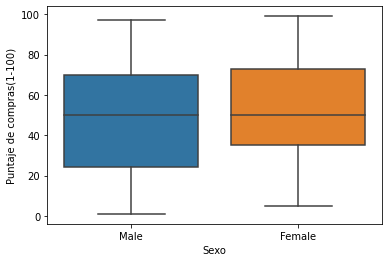

In [23]:
datf = df[df.Sexo.isin(df.Sexo.value_counts().head().index)]

sns.boxplot(
    x='Sexo',
    y='Puntaje de compras(1-100)',
    data=datf
)

En este boxplot podemos observar que efectivamente las mujeres son las que invierten mas en las compras por lo que es un punto importante a la hora de tomar nuestra decisión final

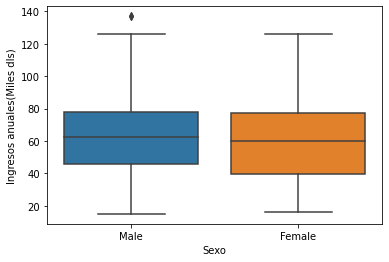

In [24]:
dati = df[df.Sexo.isin(df.Sexo.value_counts().head().index)]

sns.boxplot(
    x='Sexo',
    y='Ingresos anuales(Miles dls)',
    data=dati
)

Aunque esta otra nos dice que los hombres tienen mejores ingresos anuales que las mujeres pero esta grafica está de más

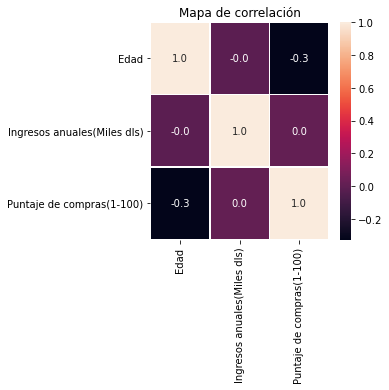

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
f,ax=plt.subplots(figsize = (4,4))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

En esta grafica de correlacion podemos observar que efectivamente los datos no se relacionan entre si dado a que ningun dato se acerca al 1.

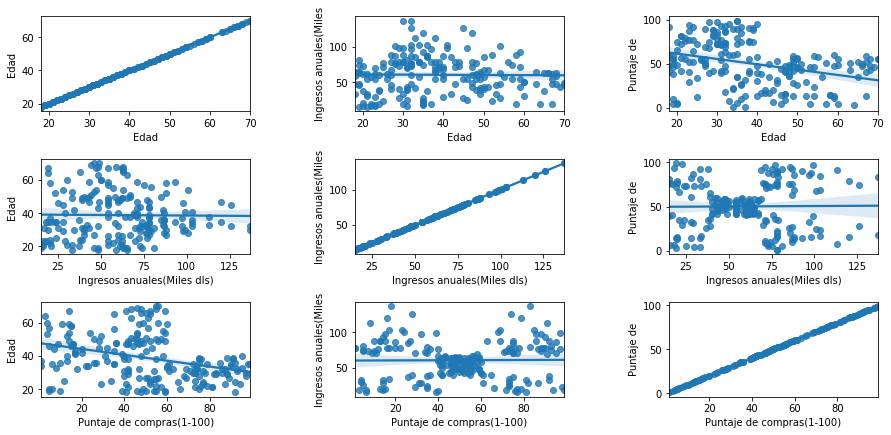

In [26]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Edad' , 'Ingresos anuales(Miles dls)' , 'Puntaje de compras(1-100)']:
    for y in ['Edad' , 'Ingresos anuales(Miles dls)' , 'Puntaje de compras(1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

Lo que se queria demostrar con estas graficas es que en verdad no se tuviera relacion alguna las 3 variables y como se puede observar ni una tiene una tendencia marcada aunque la de edad vs puntaje de compras podria tener una tendencia negativa pero muy minima  


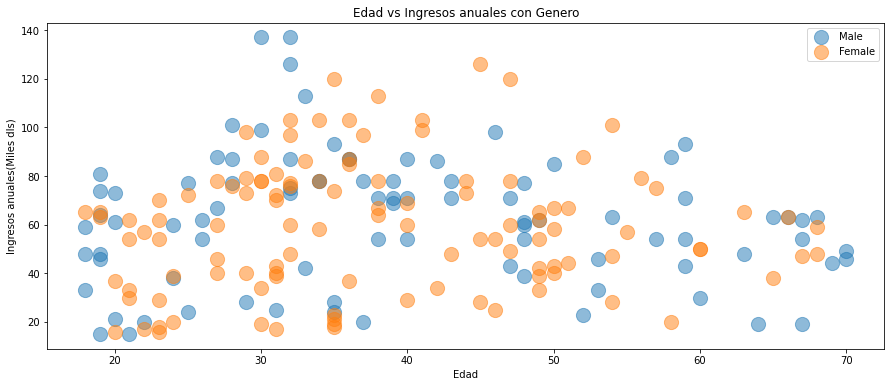

In [27]:
plt.figure(1 , figsize = (15 , 6))
for Sexo in ['Male' , 'Female']:
    plt.scatter(x = 'Edad' , y = 'Ingresos anuales(Miles dls)' , data = df[df['Sexo'] == Sexo] ,
                s = 200 , alpha = 0.5 , label = Sexo)
plt.xlabel('Edad'), plt.ylabel('Ingresos anuales(Miles dls)') 
plt.title('Edad vs Ingresos anuales con Genero')
plt.legend()
plt.show()

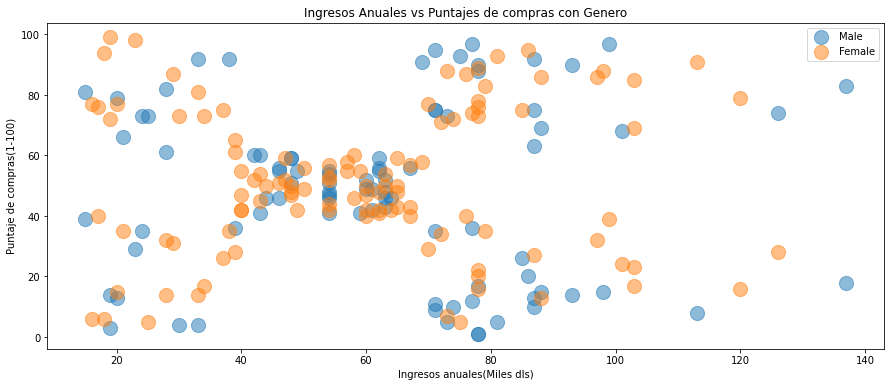

In [28]:
plt.figure(1 , figsize = (15 , 6))
for sexo in ['Male' , 'Female']:
    plt.scatter(x = 'Ingresos anuales(Miles dls)',y = 'Puntaje de compras(1-100)' ,
                data = df[df['Sexo'] == sexo] ,s = 200 , alpha = 0.5 , label = sexo)
plt.xlabel('Ingresos anuales(Miles dls)'), plt.ylabel('Puntaje de compras(1-100)') 
plt.title('Ingresos Anuales vs Puntajes de compras con Genero')
plt.legend()
plt.show()

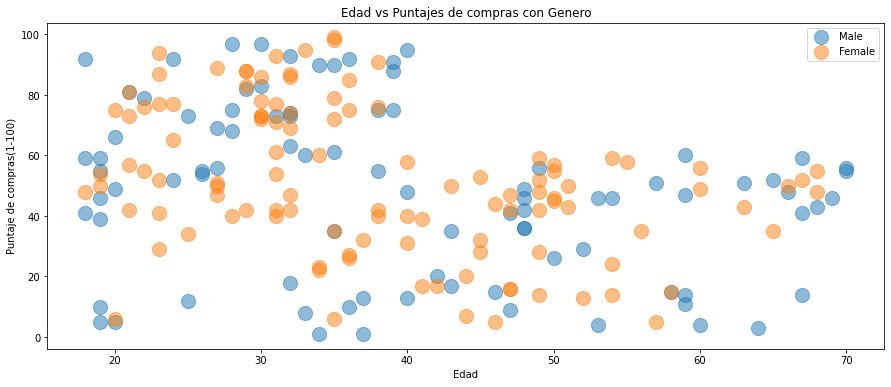

In [31]:
plt.figure(1 , figsize = (15 , 6))
for sexo in ['Male' , 'Female']:
    plt.scatter(x = 'Edad',y = 'Puntaje de compras(1-100)' ,
                data = df[df['Sexo'] == sexo] ,s = 200 , alpha = 0.5 , label = sexo)
plt.xlabel('Edad'), plt.ylabel('Puntaje de compras(1-100)') 
plt.title('Edad vs Puntajes de compras con Genero')
plt.legend()
plt.show()

Gracias a estas graficas creo que se pudo entender mejor el objetivo, dado a que nos dice casi todo y se puede concluir que:   
**1.-**Se puede apreciar que las personas con edades entre (30-40) tienden a un mejor ingreso anual que los demas gracias a la primer grafica     
**2.-**Mis clientes objetivo son de clase media dado a que los puntos se concentran entre el 40-70(ingresos anuales(Miles)) de la segunda grafica   
**3.-**Los jovenes son los que mas gastan  

# Conclusión


Puedo concluir que mi mercado o mis clientes objetivo se encuentran entre las edades 20-40 y son de clase media con ingresos  entre 40-70 mil dls anuales, por lo que se intentaria invertir mas en enfoque a los gustos que se tienen dichos clientes y gracias al boxplot que pudimos realizar nos dimos cuenta que seria mejor invertir mas en el mercado de los gustos femeninos dado a que es el grupo que mas gasta en dicho centro comercial.    
